In [ ]:
!pip install gitpython matplotlib numpy opencv-python pillow psutil PyYAML requests \
scipy thop torch torchvision tqdm ultralytics pandas seaborn setuptools filterpy \
scikit-image lap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 58.0 MB/s eta 0:00:00


**Getting dataset**

In [ ]:
!curl -L "https://universe.roboflow.com/ds/2PK7olVart?key=aK6uqnQgIV" > roboflow.zip
!unzip roboflow.zip
!rm roboflow.zip


Streaming output truncated to the last 5000 lines.
 extracting: train/labels/220_jpg.rf.6170a4d78df9cd0c6be98f83af61ffea.txt  
 extracting: train/labels/220_jpg.rf.f006b0d9621b217bbf70287a728b7150.txt  
 extracting: train/labels/222_jpg.rf.062cc58da067a8803a5c95a49c8b6b32.txt  
 extracting: train/labels/222_jpg.rf.52d1b0edcb503cb449dd606144e6e0af.txt  
 extracting: train/labels/223_jpg.rf.60ca0511819332cd69907cdf81989c68.txt  
 extracting: train/labels/223_jpg.rf.c1c026bfa0cfdd99cca33d023dfade1d.txt  
 extracting: train/labels/224_jpg.rf.664c560467d0f674f79a00c19f2bc584.txt  
 extracting: train/labels/224_jpg.rf.f10dafa8d6e9e2087ed9f6239f276eb3.txt  
 extracting: train/labels/225_jpg.rf.289491c510c998da589401537e0115bc.txt  
 extracting: train/labels/225_jpg.rf.844cbd848821f3356e15768a7a24b471.txt  
 extracting: train/labels/226_jpg.rf.4ac4bb4798dbf111dbeb541ed20e0f9a.txt  
 extracting: train/labels/226_jpg.rf.ba0ce0e6f3d3a490748a8fdf694ba31d.txt  
 extracting: train/labels/227_jpg.rf.

**Training Dataset on yolov8 model**

In [ ]:
%%writefile /content/data.yaml
train: /content/train/images
val: /content/valid/images
test: /content/test/images

nc: 6
names: ['0', '1', '2', '3', '4', '5']


Overwriting /content/data.yaml


In [ ]:
from ultralytics import YOLO

# Load a lightweight base model
model = YOLO("yolov8n.pt")

# Train the model using the fixed data.yaml file
model.train(data="/content/data.yaml", epochs=25)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 115MB/s]


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 3933 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3933/3933 [00:01<00:00, 2358.35it/s]

train: WARNING ⚠️ /content/train/images/215_jpg.rf.3f73f42d481549a3da20686b1f62e9bc.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/215_jpg.rf.4f81ca2b913f9f6d4a323b9c7ea4e060.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/264_jpg.rf.2a0f0154da577941a05301285285f4ee.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/train/images/264_jpg.rf.cadcfb7b68329b5b9a5855914fc8a5ec.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/train/images/308_jpg.rf.9ca00d37f9372fc3d7d413aec4b55b26.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/308_jpg.rf.d5d36aa23f2ac496e5b67c4bad69be6a.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/315_jpg.rf.c0afa264e0a18531ff1fe81a3aa11cdd.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/315_jpg.rf.eb5cf402aefb59177a048761cd11a218.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/35_jpg.rf.37d50aedc497056653c38a

train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 1086 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1086/1086 [00:01<00:00, 932.73it/s]

val: WARNING ⚠️ /content/valid/images/133_jpg.rf.18f4f04bdc636b2c87131e217e1e12f1.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/valid/images/133_jpg.rf.8edfd4ce0f752f44bd8412ec337a8dab.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/valid/images/190_jpg.rf.6f3599d08cd2754c955569ce66e5dffa.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/valid/images/190_jpg.rf.91854eef95a2bd829c367fdccda7f20c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/valid/images/240_jpg.rf.9011089c83a542f6f93f26d077ffbeb1.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/valid/images/240_jpg.rf.92520fb287f7b09d3cc4ff14e5ac3f02.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/valid/images/248_jpg.rf.1ce1db3c0905ecfadccf51a313c62efc.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/valid/images/248_jpg.rf.c170d0dea5525ec29f27fa04907c5a52.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/valid/images/286_jpg.rf.e2f0672a56bf65858046223ac2f9cdf6.jpg: 1

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.06G       1.14      2.449      1.229         22        640: 100%|██████████| 246/246 [01:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.15it/s]


                   all       1086       1202      0.832      0.833      0.875      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.55G      1.101      1.446      1.175         29        640: 100%|██████████| 246/246 [01:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.38it/s]


                   all       1086       1202      0.881      0.885      0.919       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.57G      1.077       1.14      1.164         26        640: 100%|██████████| 246/246 [01:10<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.51it/s]

                   all       1086       1202      0.925      0.826      0.927      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.57G      1.055     0.9746      1.157         30        640: 100%|██████████| 246/246 [01:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.61it/s]

                   all       1086       1202      0.853      0.715      0.823      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.59G      1.019     0.8528      1.132         26        640: 100%|██████████| 246/246 [01:10<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       1086       1202      0.946      0.867      0.945      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.61G     0.9842     0.7708      1.116         28        640: 100%|██████████| 246/246 [01:09<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.49it/s]

                   all       1086       1202      0.963      0.886       0.95      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.62G     0.9486     0.7112        1.1         32        640: 100%|██████████| 246/246 [01:08<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]

                   all       1086       1202      0.975       0.94      0.976      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.64G     0.9316     0.6801      1.091         19        640: 100%|██████████| 246/246 [01:08<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.40it/s]

                   all       1086       1202      0.952      0.965      0.978      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.66G     0.9126     0.6451      1.082         29        640: 100%|██████████| 246/246 [01:08<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.45it/s]

                   all       1086       1202      0.961      0.933      0.964      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.68G     0.8893     0.6159      1.074         22        640: 100%|██████████| 246/246 [01:08<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.48it/s]

                   all       1086       1202       0.97      0.939      0.968      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.69G     0.8621     0.5846      1.055         20        640: 100%|██████████| 246/246 [01:08<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.48it/s]

                   all       1086       1202      0.983      0.965      0.982      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.71G     0.8639     0.5731      1.055         37        640: 100%|██████████| 246/246 [01:08<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]

                   all       1086       1202      0.972      0.965      0.984      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.73G     0.8391     0.5459      1.043         21        640: 100%|██████████| 246/246 [01:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]

                   all       1086       1202      0.968       0.97      0.979      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.74G     0.8234     0.5279      1.037         24        640: 100%|██████████| 246/246 [01:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.61it/s]

                   all       1086       1202      0.978       0.97      0.982      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.76G     0.8166     0.5214      1.037         24        640: 100%|██████████| 246/246 [01:09<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.45it/s]

                   all       1086       1202      0.977      0.969      0.984      0.802


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.78G     0.7116     0.4166     0.9896         14        640: 100%|██████████| 246/246 [01:07<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.50it/s]

                   all       1086       1202      0.976      0.966      0.984      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       2.8G     0.6945     0.3927     0.9764         14        640: 100%|██████████| 246/246 [01:06<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.86it/s]

                   all       1086       1202      0.975      0.974      0.983      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.81G     0.6773     0.3747     0.9691         16        640: 100%|██████████| 246/246 [01:07<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]

                   all       1086       1202      0.975      0.975      0.983      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.83G     0.6562     0.3605     0.9592         16        640: 100%|██████████| 246/246 [01:07<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.56it/s]

                   all       1086       1202       0.98      0.969      0.982      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.85G     0.6376     0.3467     0.9481         14        640: 100%|██████████| 246/246 [01:06<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.43it/s]

                   all       1086       1202      0.981      0.971      0.985       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.87G       0.62     0.3367     0.9445         13        640: 100%|██████████| 246/246 [01:08<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.33it/s]

                   all       1086       1202      0.976      0.977      0.989      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.88G     0.6127     0.3273     0.9387         13        640: 100%|██████████| 246/246 [01:06<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.44it/s]

                   all       1086       1202      0.982      0.976      0.985      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       2.9G     0.5939      0.315     0.9264         16        640: 100%|██████████| 246/246 [01:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.50it/s]

                   all       1086       1202      0.985      0.975      0.985      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.92G      0.578     0.3048     0.9234         16        640: 100%|██████████| 246/246 [01:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.51it/s]

                   all       1086       1202      0.985      0.975      0.986      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.94G     0.5589     0.2945     0.9268         17        640: 100%|██████████| 246/246 [01:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.91it/s]

                   all       1086       1202      0.985      0.977      0.986      0.854



25 epochs completed in 0.549 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.19it/s]


                   all       1086       1202      0.985      0.977      0.986      0.854
                     0        114        120      0.947      0.888      0.946      0.744
                     1        354        360      0.977      0.983      0.991      0.873
                     2         26         26      0.992          1      0.995      0.917
                     3        242        244      0.998      0.992      0.995      0.826
                     4        212        212      0.998          1      0.995      0.875
                     5        222        240          1          1      0.995      0.889
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b127eacd390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     


image 1/1 /content/test/images/test.jpg: 640x640 1 1, 1 2, 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


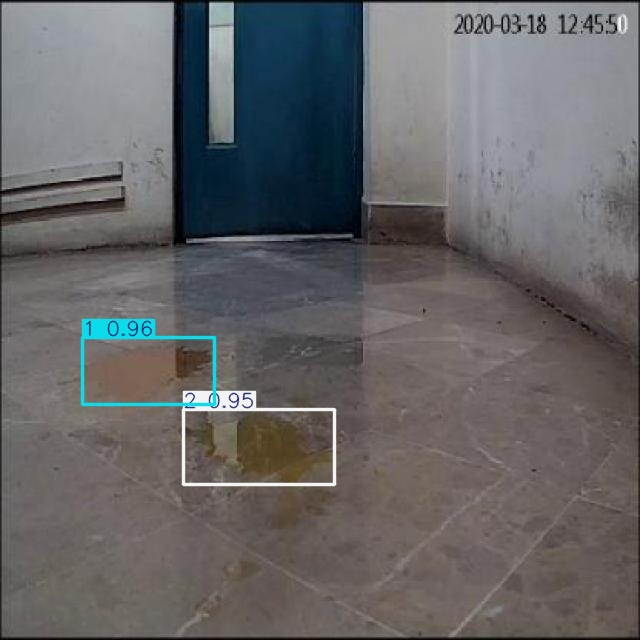

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import glob

# Load your trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Run prediction on the uploaded image
results = model.predict(source="/content/test/images/test.jpg", save=True)

# Automatically find and display the output image
output_path = glob.glob("runs/detect/predict*/test.jpg")[-1]
display(Image(filename=output_path))


In [ ]:
!cat runs/detect/train/results.csv


epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
1,89.7545,1.14024,2.44892,1.22911,0.83202,0.83282,0.87488,0.62063,1.02506,1.23556,1.12,0.000331978,0.000331978,0.000331978
2,175.758,1.10131,1.44557,1.17505,0.88109,0.88471,0.91933,0.63971,1.04157,0.91334,1.14313,0.000638965,0.000638965,0.000638965
3,256.011,1.07735,1.1399,1.16419,0.9254,0.82592,0.92659,0.65752,1.01696,0.77779,1.10025,0.000919552,0.000919552,0.000919552
4,336.007,1.05469,0.97464,1.15731,0.85313,0.71493,0.82313,0.54639,1.17644,1.09998,1.25275,0.0008812,0.0008812,0.0008812
5,415.69,1.01881,0.85281,1.13219,0.9464,0.86682,0.94461,0.70148,0.94307,0.64539,1.05248,0.0008416,0.0008416,0.0008416
6,495.108,0.98419,0.77078,1.11619,0.96268,0.88603,0.95014,0.72461,0.94311,0.62181,1.05557,0.000802,0.000802,0.000802
7,573.395,0.94861,0.71118,1.09951,0.97514,0.94022,0.9755,0.74632,0.87567,0.52321